In [1]:
%run init_notebookspace.py
from settings import DATA_DIR, MODEL_DIR

DATA_DIR is existant under: C:\Users\LukasGrahl\Documents\GIT\memoire1\data


In [2]:
%matplotlib inline

from gEconpy.classes.model import gEconModel
from gEconpy.plotting import plotting as gp

import matplotlib.pyplot as plt
import seaborn as sns
from src.plotting import plot_irfs

import numpy as np
import pandas as pd

import os

In [4]:
mod = gEconModel(os.path.join(MODEL_DIR, 'gEconpy_mod6.gcn'), verbose=True)

Model Building Complete.
Found:
	20 equations
	20 variables
	The following variables were eliminated at user request:
		U_t
	1 stochastic shock
		 1 / 1 have a defined prior. 
	8 parameters
		 1 / 8 have a defined prior. 
	0 calibrating equations
	0 parameters to calibrate
 Model appears well defined and ready to proceed to solving.



In [151]:
# assign parameters
true_params = {
    "sigma_C": 2,
    "sigma_L": 1.5,
    "alpha": .35,
    "beta": .985,
    "delta": .025,
    "rho_A": .95,
    "Theta": .75,
    "psi": 8
}

true_shocks = {
    "epsilon": .22
}

mod.free_param_dict.update(true_params)
mod.free_param_dict

{'Theta': 0.75,
 'alpha': 0.35,
 'beta': 0.985,
 'delta': 0.025,
 'psi': 8,
 'rho_A': 0.95,
 'sigma_C': 2,
 'sigma_L': 1.5}

Investigate priors

Solve

In [183]:
%time mod.steady_state()

Steady state found! Sum of squared residuals is 1.0400859941440069e-25
CPU times: total: 1.23 s
Wall time: 1.51 s


In [184]:
# steady state values
mod.print_steady_state()

A_ss               1.000
C_ss               0.739
I_ss               0.039
Kd_ss              1.547
Ks_ss              1.547
Ld_ss              0.537
Ls_ss              0.537
P_hat_ss           1.842
P_ss               1.842
Pi_ss              1.105
Q_ss               1.842
TC_ss             -0.328
Y_ss               0.778
g1_ss              1.612
lambda_ss          0.993
mc_ss              0.421
pi_ss              1.000
q_ss               1.830
r_ss               0.074
w_ss               0.396


In [185]:
mod.solve_model(solver="gensys")

[0, 1, 0]
Norm of deterministic part: 1.035522287
Norm of stochastic part:    1.035522287


In [187]:
mod.check_bk_condition()
;

Model solution has 5 eigenvalues greater than one in modulus and 4 forward-looking variables.
Blanchard-Kahn condition is satisfied.


''

In [189]:
for name, policy_matrix in zip(["T", "R"], [round(mod.T, 5), round(mod.R, 5)]):
    print(name.center(10).center(50, "="))
    print(policy_matrix.to_string())

====================    T     ====================
              A    C    I   Kd       Ks   Ld   Ls         P  P_hat   Pi    Q   TC    Y   g1  lambda   mc   pi    q    r    w
A       0.94944 -0.0  0.0  0.0  0.00017  0.0  0.0  -0.02512    0.0  0.0  0.0 -0.0  0.0  0.0    -0.0 -0.0  0.0  0.0 -0.0 -0.0
C       0.63390 -0.0 -0.0  0.0  0.29967  0.0  0.0  -0.31142    0.0  0.0  0.0  0.0  0.0  0.0    -0.0 -0.0  0.0 -0.0  0.0 -0.0
I       5.09744 -0.0  0.0  0.0 -0.55325  0.0  0.0 -37.98698    0.0 -0.0  0.0  0.0  0.0  0.0    -0.0 -0.0  0.0  0.0 -0.0 -0.0
Kd      0.12717  0.0 -0.0  0.0  0.96125  0.0  0.0  -0.96157    0.0  0.0  0.0  0.0  0.0  0.0    -0.0 -0.0  0.0 -0.0 -0.0 -0.0
Ks      0.12735  0.0 -0.0 -0.0  0.96120  0.0  0.0  -0.95367    0.0  0.0  0.0  0.0  0.0  0.0    -0.0 -0.0  0.0 -0.0  0.0 -0.0
Ld     -0.19480 -0.0  0.0  0.0 -0.12748  0.0  0.0  -2.01018    0.0 -0.0  0.0  0.0  0.0  0.0    -0.0 -0.0  0.0  0.0 -0.0 -0.0
Ls     -0.19222 -0.0  0.0  0.0 -0.12827  0.0  0.0  -1.89438    0.0 -0.0  0

Model stats

In [190]:
_plot_vars = ['A', 'C', 'I', 'Kd', 'Ld', 'P', 'P_hat', 'Pi', 'Y', 'pi', 'r', 'w']

''

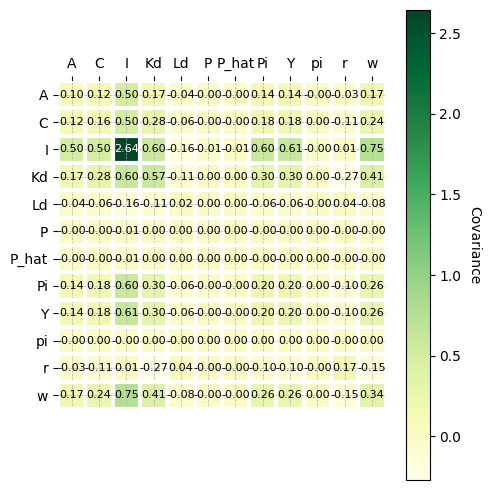

In [191]:
scov = mod.compute_stationary_covariance_matrix()
gp.plot_covariance_matrix(scov,
                          _plot_vars,
                         figsize=(7,7))
;

C:\Users\LukasGrahl\Documents\GIT\memoire1\env_memoire1\lib\site-packages\gEconpy\plotting\plotting.py:691: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout()
C:\Users\LukasGrahl\AppData\Local\Temp\ipykernel_20356\1838577660.py:3: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


''

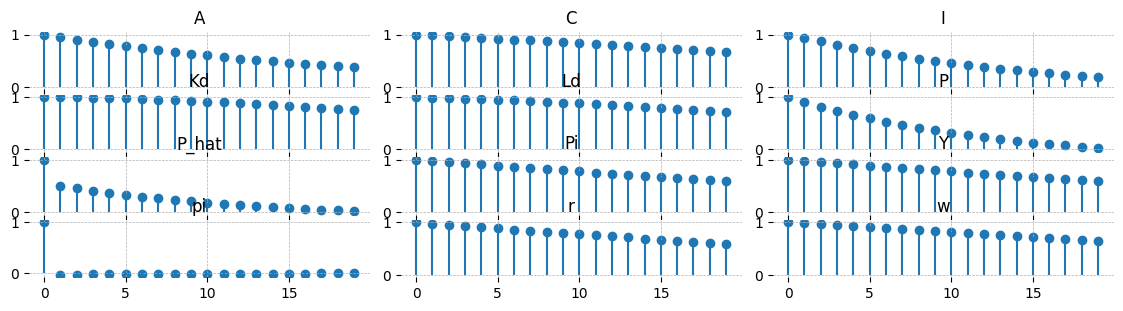

In [194]:
acorr = mod.compute_autocorrelation_matrix(n_lags=20)
gp.plot_acf(acorr, _plot_vars, n_cols=3)
plt.tight_layout()
;

IRF

In [244]:
irf = mod.impulse_response_function()
_irf = irf.unstack().loc[:, "epsilon_A"].unstack()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


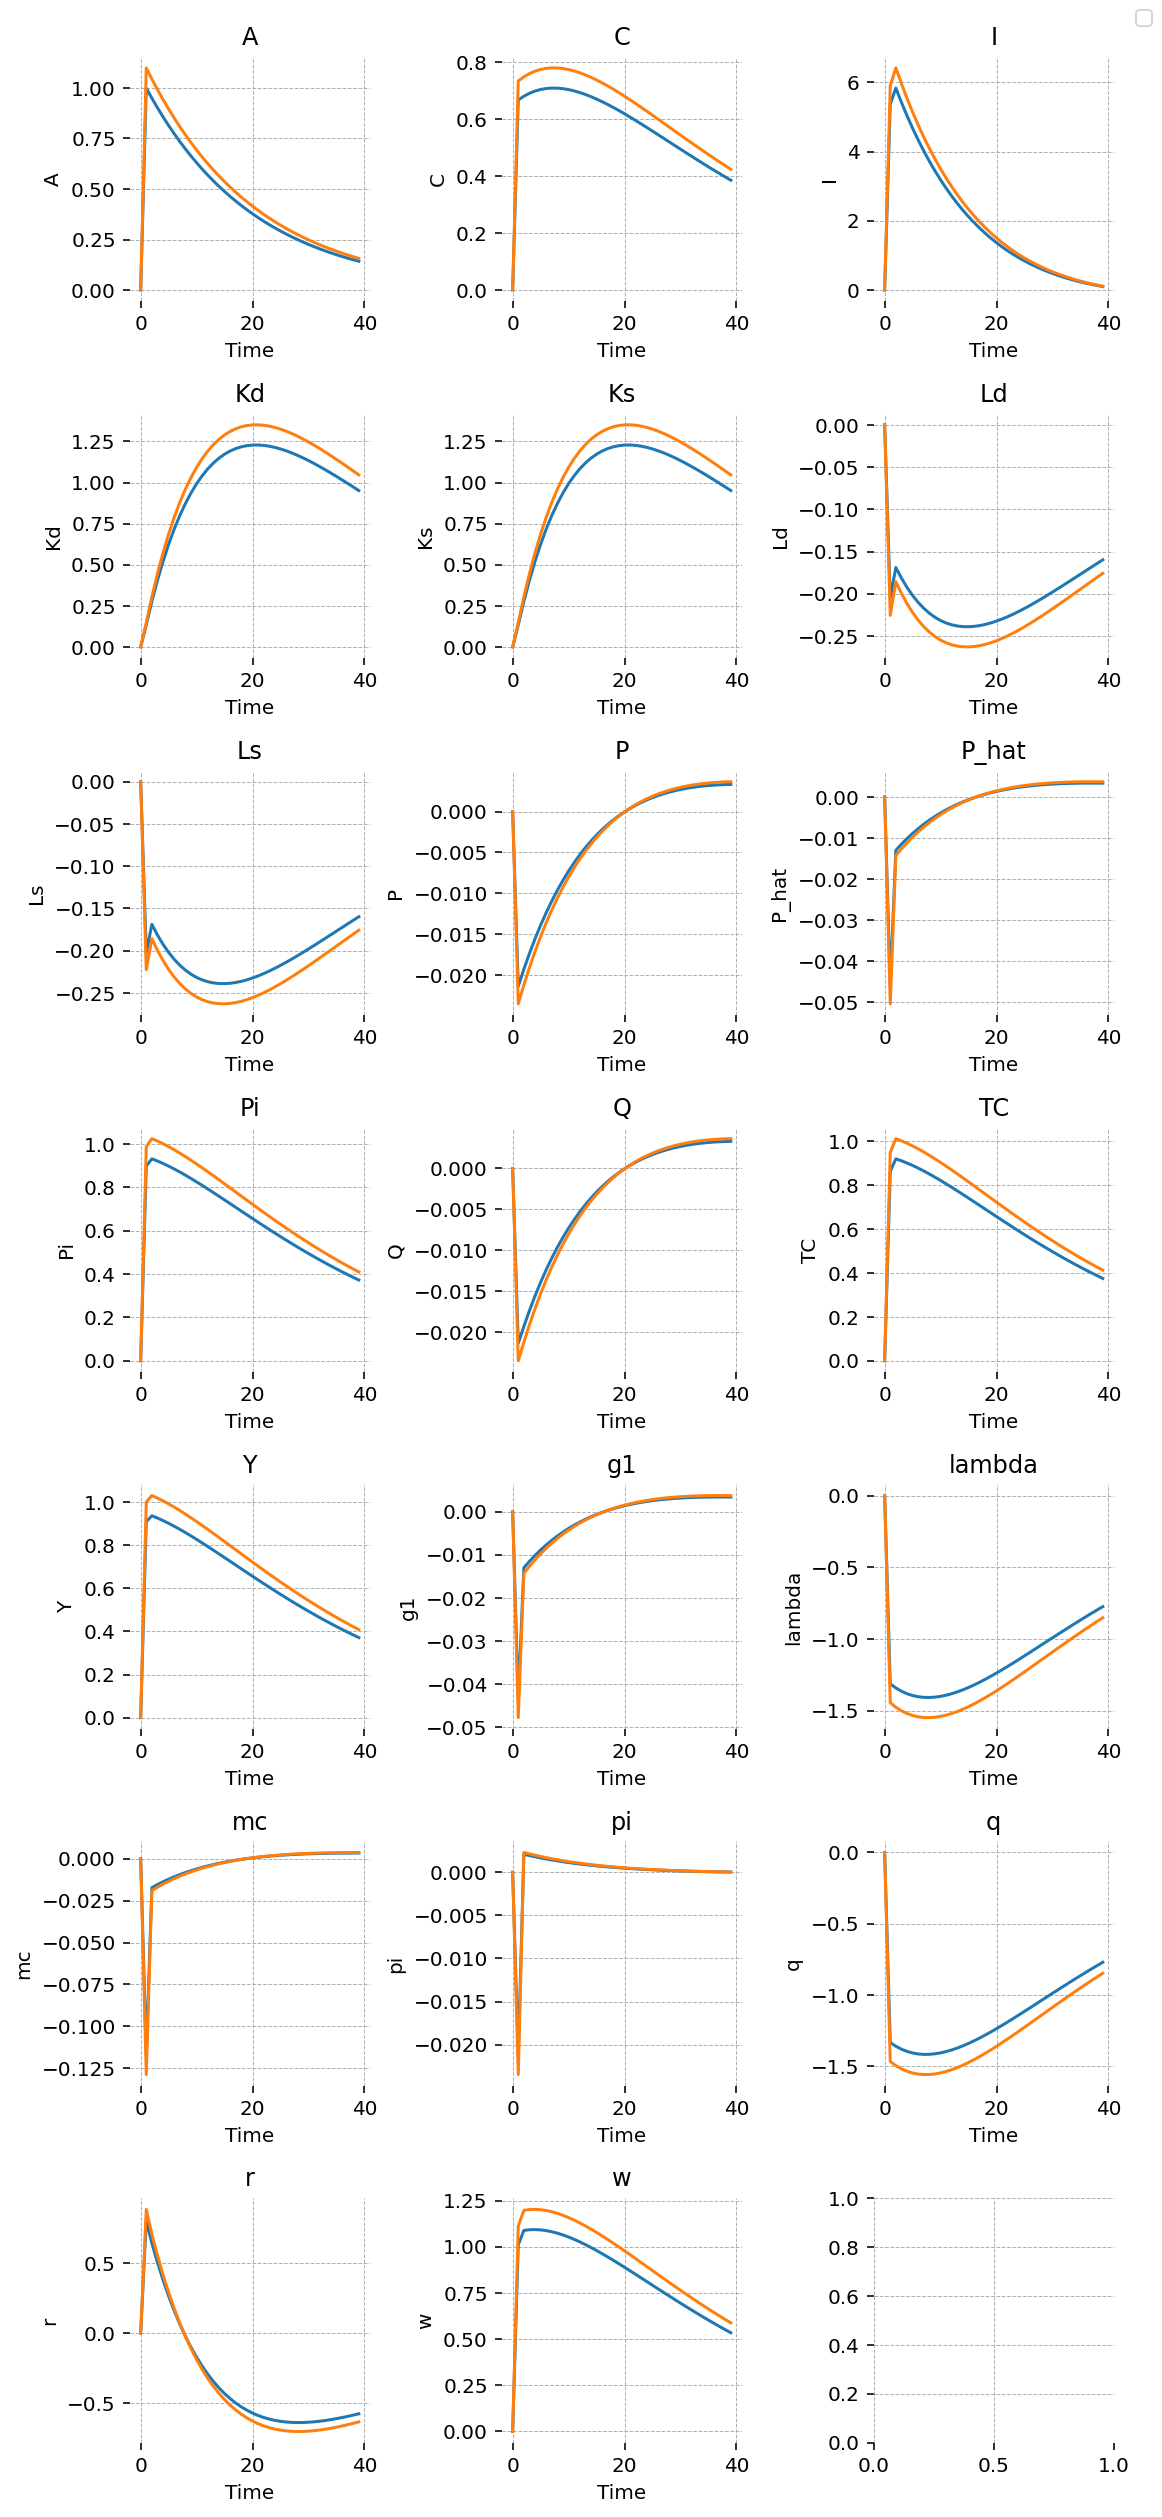

In [247]:
plot_irfs([_irf], sns.lineplot)